<a href="https://colab.research.google.com/github/Zobiya-12/ADM/blob/main/LAB%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = '/content/archive.zip'  # Replace with your file path
data = pd.read_csv(file_path)
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Handling missing values

In [ ]:
import pandas as pd

# Columns that may have 0 values that should be treated as missing
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Ensure the specified columns are of type float (if they are not already)
data[columns_with_zeros] = data[columns_with_zeros].apply(pd.to_numeric, errors='coerce')

# Replace 0 values with pd.NA in the specified columns
for column in columns_with_zeros:
    data[column] = data[column].replace(0, pd.NA)

# Impute missing values for Glucose, BloodPressure, and BMI with the mean
for column in ["Glucose", "BloodPressure", "BMI"]:
    data[column] = data[column].fillna(data[column].mean())

# Impute missing values for SkinThickness and Insulin with the median
for column in ["SkinThickness", "Insulin"]:
    data[column] = data[column].fillna(data[column].median())

# Verify there are no missing values left
print("Missing values after imputation:")
print(data.isna().sum())

# Optional: Check the first few rows to ensure everything looks correct
print(data.head())


Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   3

#Scaling

In [ ]:
# Min-Max Normalization
import seaborn as sns
df = data.drop('Pregnancies', axis=1)
df_norm = (df-df.min())/(df.max()-df.min())
df_norm = pd.concat((df_norm, data.Pregnancies),axis= 1)

print("Scaled Dataset Using Pandas")
df_norm.head()

Scaled Dataset Using Pandas


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies
0,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1.0,6
1,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0.0,1
2,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1.0,8
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0,1
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0,0


<Figure size 1000x800 with 0 Axes>

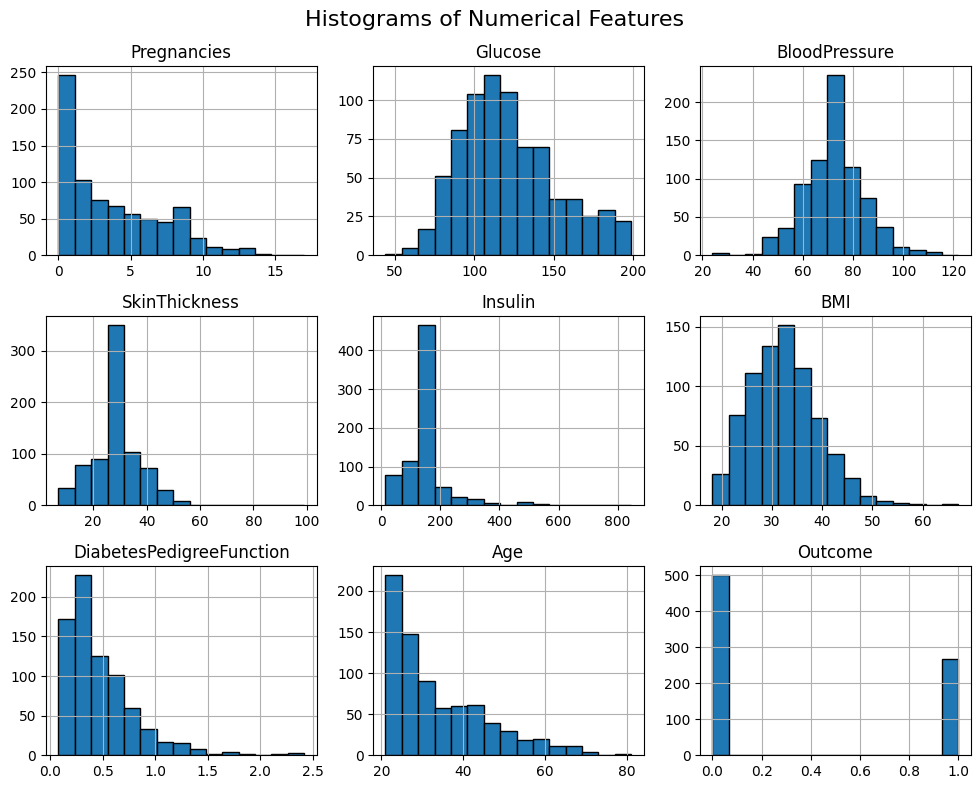

In [15]:
# Plotting histograms for all numerical features in the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
data.hist(figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


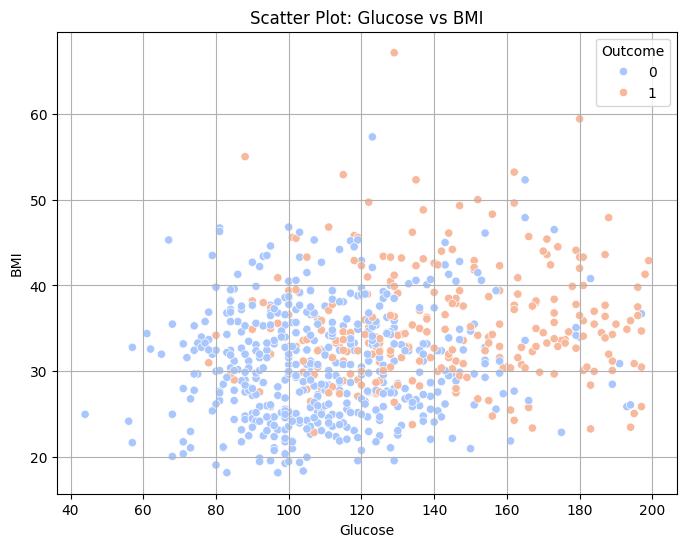

In [17]:
# Scatter plot between Glucose and BMI to show relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Glucose'], y=data['BMI'], hue=data['Outcome'], palette="coolwarm")
plt.title("Scatter Plot: Glucose vs BMI")
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.grid()
plt.show()


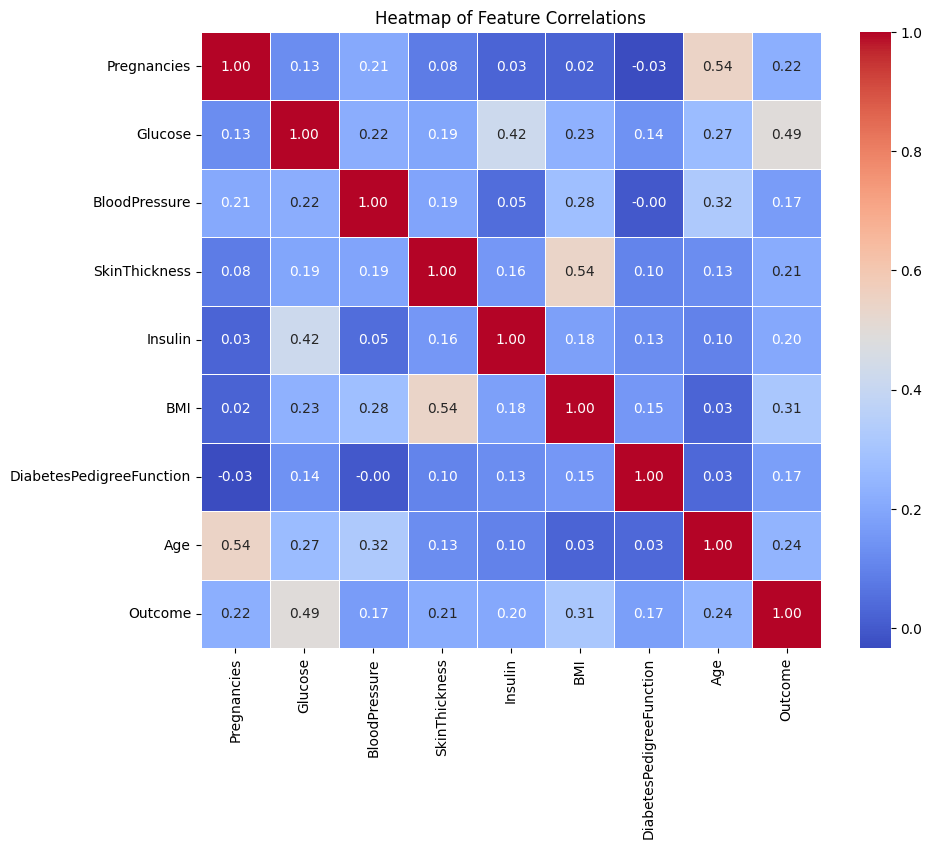

In [18]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()
